In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [2]:
database = pd.read_csv('Bank.csv')

In [3]:
database.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
database.info()
#this gives us a general summary of the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [34]:
print(database.isnull().values.any())
# Here we confirm what we already saw in the previous line of code, that there are no missing values in the database.

False


In [8]:
database.describe()
# 5-pt Summary of the numerical columns of the database.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


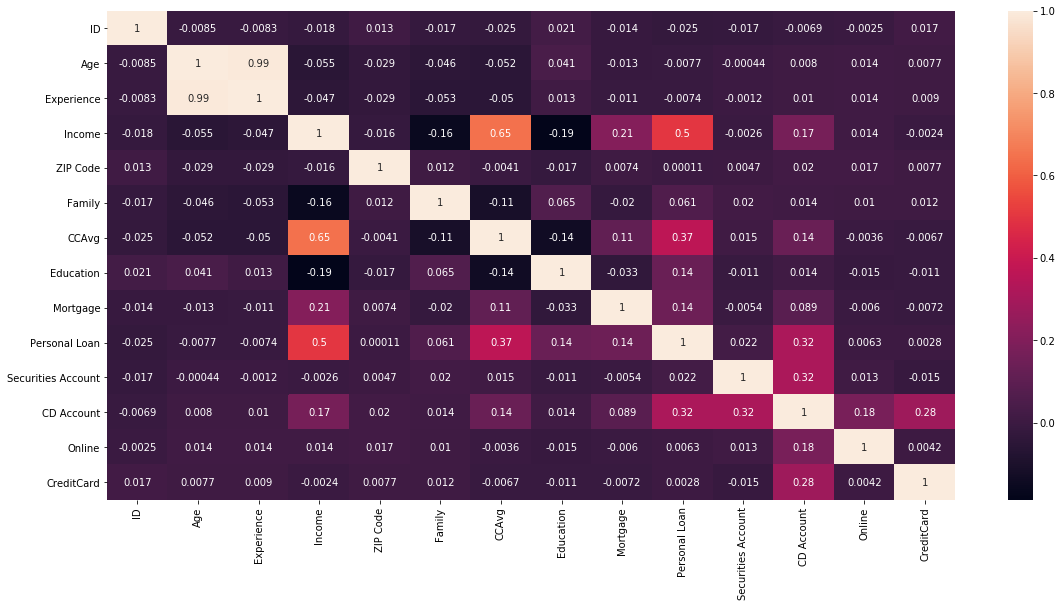

In [9]:
database.corr()
plt.figure(figsize = (19,9))
sns.heatmap(database.corr(), annot=True)
# Here we look at the correlation of different rows. We are primarily intrested with the correlation of the 
# dependent variable 'Personal Loan' vs the independent variables. We can see which factors affect the likelyhood of a 
# client being interested in a personal loan. 
# To reduce complexity of the prediction model, we can drop those columns(independent variables) which show no or very low
# correlation to the dependent variable.

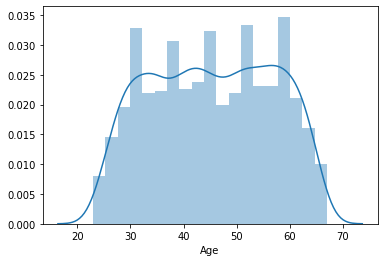

In [10]:
#Frequency Distribution of Independent Variables
sns.distplot(database['Age'])
# In the case of age of customers we find a pretty uniform distribution with occational peaks, with the youngest 23 and the
# oldest 67.

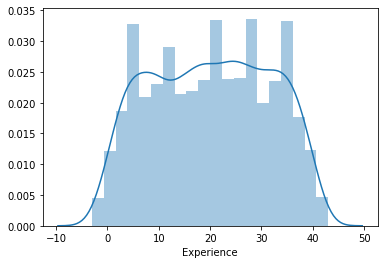

In [11]:
sns.distplot(database['Experience'])
# Here too we have a pretty uniform distribution with occational peaks. (Experience less than 0 is obviously an error in 
# the data which we will address later on)

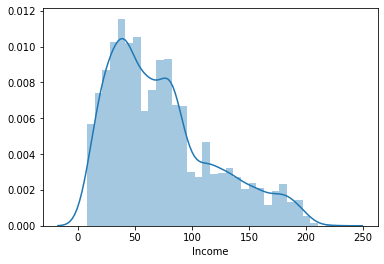

In [12]:
sns.distplot(database['Income'])
# In the case of income we notice a gaussian distibution that is skewed to the left tail. Meaning that the majority of the 
# customers are of lower to mid income.

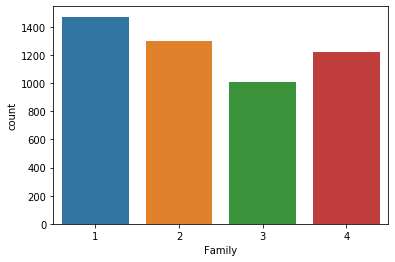

In [13]:
sns.countplot(database['Family'])
# Family size while ranging from 1 to 4 is pretty evenly distributed.

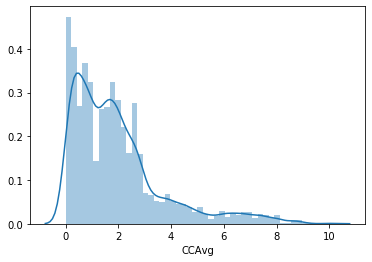

In [14]:
sns.distplot(database['CCAvg'])
# Similar to income here to we see a gaussian distribution which is skewed to the left, meaning that the customer are 
# either not using a credit cart (as represented by the peak at 0), and those whose who use them tend to spend less than
# $3000.

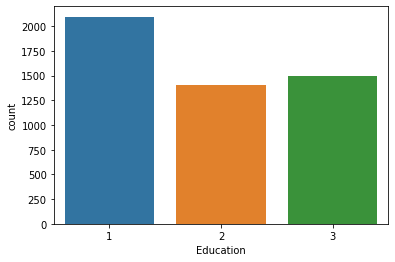

In [15]:
sns.countplot(database['Education'])
# Once again educational qualifications are uniformmly distributed with number of undergrads slightly higher than the rest.

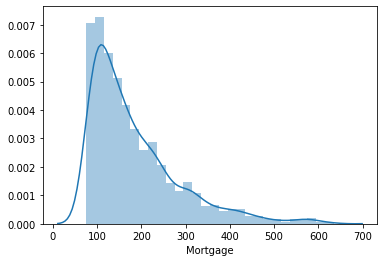

In [16]:
Mortgage = database[database['Mortgage'] != 0] 
sns.distplot(Mortgage['Mortgage'])
# The mortgage of the customers also gives us a gaussian distribution heavily represented in the left tail, indicating 
# lower mortgages are predominant. (Note: We have removed those with no mortgages for a clearer representation).

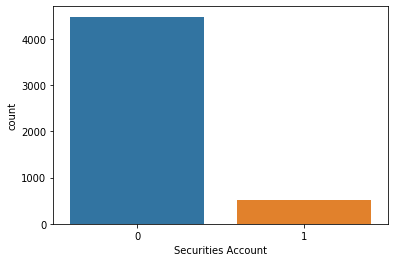

In [17]:
sns.countplot(database['Securities Account'])
# Most of the clients do not have a securities account.(Less than 10% have a securities account)

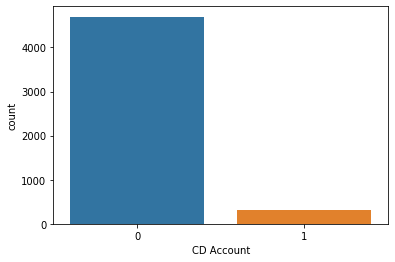

In [18]:
sns.countplot(database['CD Account'])
# Most of the clients do not have a CD account.(Less than 5% have a CD account)

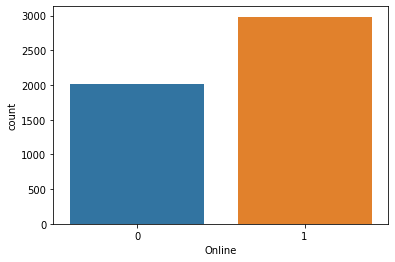

In [19]:
sns.countplot(database['Online'])
# Almost 60% of customers utilize online banking.

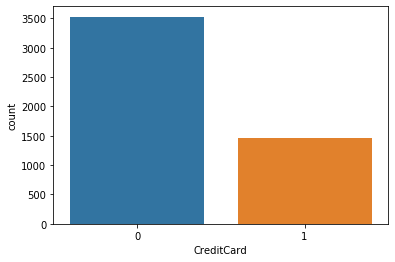

In [20]:
sns.countplot(database['CreditCard'])
# Around 30% of customers utilize credit cards.

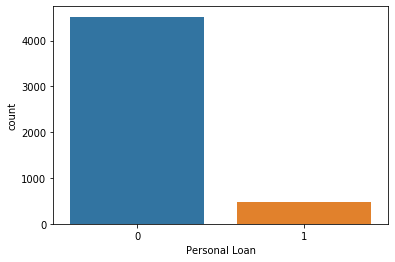

In [21]:
#Frequency Distribution of Dependent Variable
sns.countplot(database['Personal Loan'])
# From our given data, only 480 of the 5000 (9.6%) customers accepted personal loans.

In [22]:
x = database.drop(['ID','Personal Loan','ZIP Code'],axis=1)
y = database[['Personal Loan']]
# in the case of 'x' we are dropping the dependent varible, ID and Zip Code. The latter 2 dont offer anything in terms of
# classification as seen from the correlation heatmap above.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Splitting the data into training and test set in the ratio of 70:30 respectively

Performance = pd.DataFrame(np.random.rand(4,4),index='Logistic_Regression Naive_Bayes KNN SVM '.split(),columns='Training Testing True_Positive False_Negetive'.split())

In [23]:
#Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))


# Linear Regression is the simplest classification model, and as apparent doesnt work well here.
# Moving on to better Classification models,

0.3916741993646933
0.3704486427505387


In [24]:
#Logistic Regression
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))


0.952
0.9453333333333334


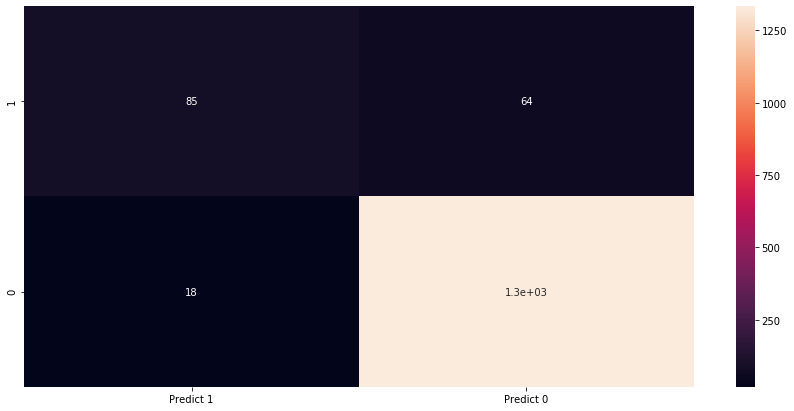

In [25]:
#Confusion Matrix for Logistic Regression
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[0,:]=[model.score(x_train, y_train), model.score(x_test, y_test), cfm.iloc[0,0], cfm.iloc[0,1]]

In [26]:
#Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))


0.89
0.8746666666666667


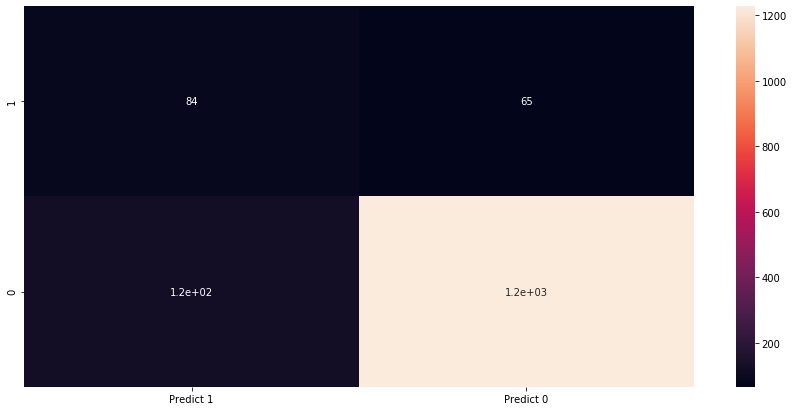

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[1,:]=[model.score(x_train, y_train), model.score(x_test, y_test), cfm.iloc[0,0], cfm.iloc[0,1]]

In [28]:
#K Nearest Neighbours
model = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# K value was chosen after performing a trail and error run of different K Values to find the lowest K value with best
# performance. How this was done is shown below (After the confusion Matrix).

1.0
0.9113333333333333


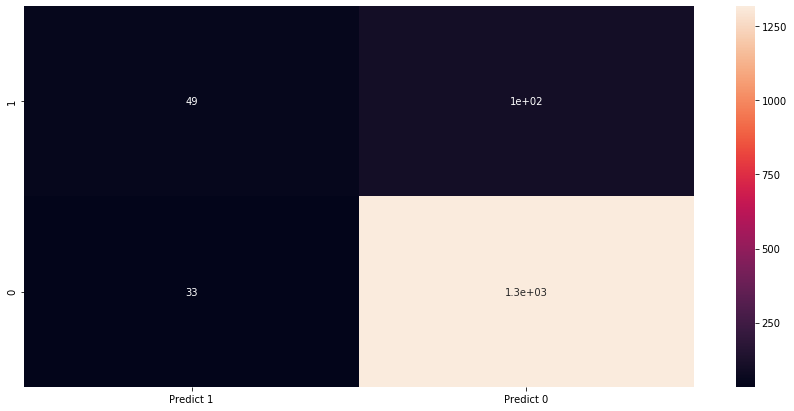

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[2,:]=[model.score(x_train, y_train), model.score(x_test, y_test), cfm.iloc[0,0], cfm.iloc[0,1]]

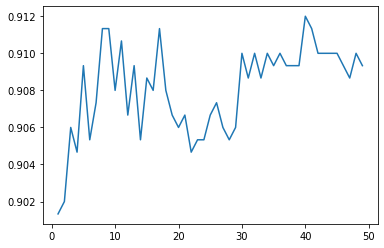

In [30]:
#Value of K
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train.values.ravel())
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,50),scores)

In [31]:
#Support Vector Machine
model = svm.SVC(gamma=0.025, C=3)
model.fit(x_train , y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Value of Gamma and C must be chosen after trail and error method.

0.9902857142857143
0.9273333333333333


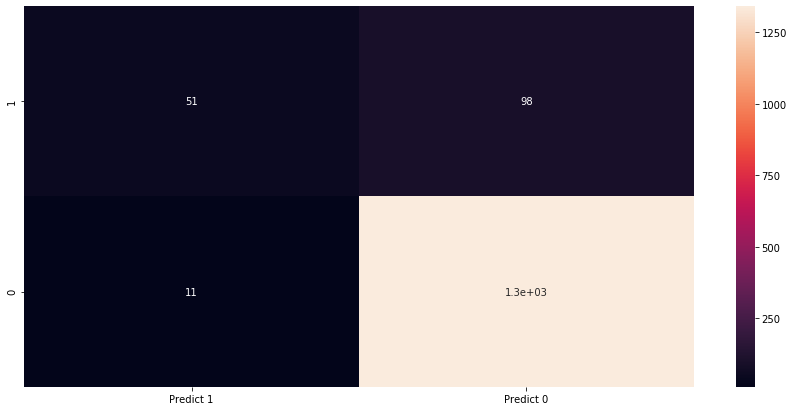

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[3,:]=[model.score(x_train, y_train), model.score(x_test, y_test), cfm.iloc[0,0], cfm.iloc[0,1]]

In [33]:
Performance.head()

,Training,Testing,True_Positive,False_Negetive
Logistic_Regression,0.952000,0.945333,85.0,64.0
Naive_Bayes,0.890000,0.874667,84.0,65.0
KNN,1.000000,0.911333,49.0,100.0
SVM,0.990286,0.927333,51.0,98.0


##### Looking at our 5 classifier models we can readily discount Linear regression as it shows very poor performance. Of the remaining 4, all of them show good classification accuracy on the out sample data, ranging from 87% to 94%.  Our first instinct would be to select Logistic Regression without looking any further due to its better accuracy. However it is important to note that in our classification problem our main objective is to identify as many customers as possible who might be interested in accepting personal loans. Therfore although both true positives and true negetives are given equal weightage while calculating accuracy, our primary objective is to maximize the true posetives. We want to identify as many customers as possible who might be interested in accepting personal loans. 

##### Therfore we are looking to Maximize True Positives and Minimize False Negetives as much as possible while trying to maintain good Accuracy. From the performance values of the different classifiers tabulated above we can see that Logistic regression and Naive Bayes best give us what we want. Of the two, Logistic Regression performs better in terms of accuracy. Hence we can conclude that the Logistic Regression Model Works Best for our Classification Problem